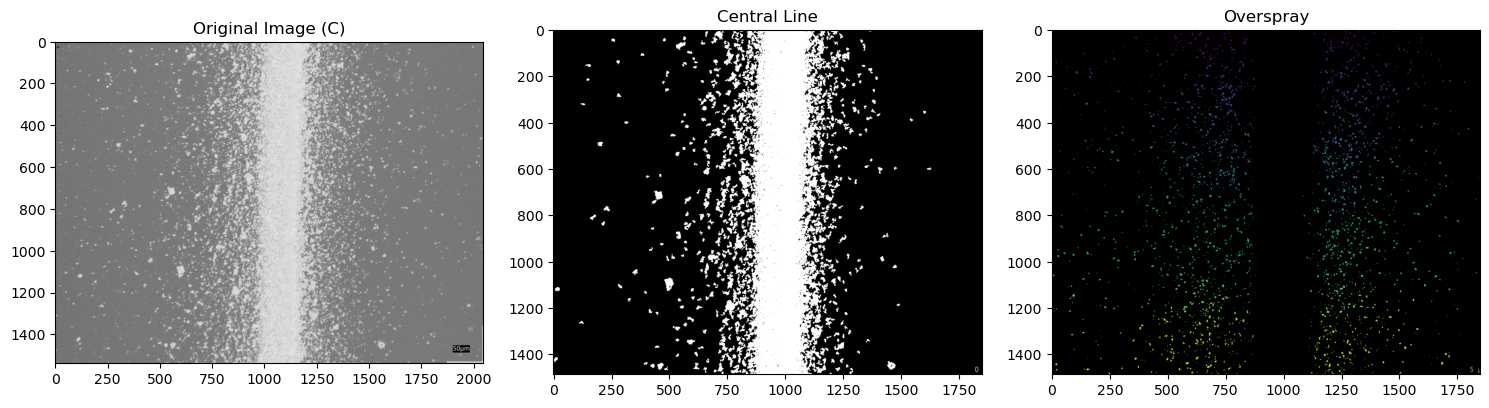

In [9]:
def process_image(image_path):
    # Read the image
    input_image = imread(image_path)[:, :, 0]
    height, width = input_image.shape

    # 1. Convert image to numpy array A (it's already a numpy array after imread)
    A = input_image

    # 2. Create array B of ones with same size as A
    B = np.ones_like(A)

    # 3. Multiply B by 255
    B = B * 255

    # 4. Create matrix C = B - A
    C = B - A

    # Convert to uint8 for contour detection
    C_uint8 = C.astype(np.uint8)

    # Apply Otsu thresholding to create binary image
    _, binary = cv2.threshold(C_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find connected components
    labeled_array, num_labels = label(binary)

    # Create a color map for visualization
    colors = plt.cm.viridis(np.linspace(0, 1, num_labels))[:, :3]

    # Create image with unique colors for each component
    central_line_mask = np.zeros_like(C_uint8)
    overspray_mask = np.zeros((C_uint8.shape[0], C_uint8.shape[1], 3), dtype=np.uint8)  # RGB mask

    for i in range(1, num_labels):
        if np.sum(labeled_array == i) > 100:  # Filter out small components
            central_line_mask[labeled_array == i] = 255
        else:
            # Apply RGB color to overspray mask
            overspray_mask[labeled_array == i] = (colors[i-1] * 255).astype(np.uint8)

    # Crop the images
    crop_bottom = 50
    crop_sides = 100
    central_line_image = central_line_mask[0:height-crop_bottom, crop_sides:width-crop_sides]
    overspray_image = overspray_mask[0:height-crop_bottom, crop_sides:width-crop_sides]

    # Display the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    axs[0].imshow(C_uint8, cmap='gray')
    axs[0].set_title('Original Image (C)')
    axs[1].imshow(central_line_image, cmap='gray')
    axs[1].set_title('Central Line')
    axs[2].imshow(overspray_image)
    axs[2].set_title('Overspray')
    plt.tight_layout()
    plt.show()

    return central_line_image, overspray_image

# Usage
image_path = "/Users/srikar/Desktop/AJP new data/UT_C9_FR10_S2_t1.tif"
central_line_image, overspray_image = process_image(image_path)


/var/folders/j9/nxw6tr6x2630lrfnp_vmnv0m0000gn/T/ipykernel_37924/2359165434.py:3: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


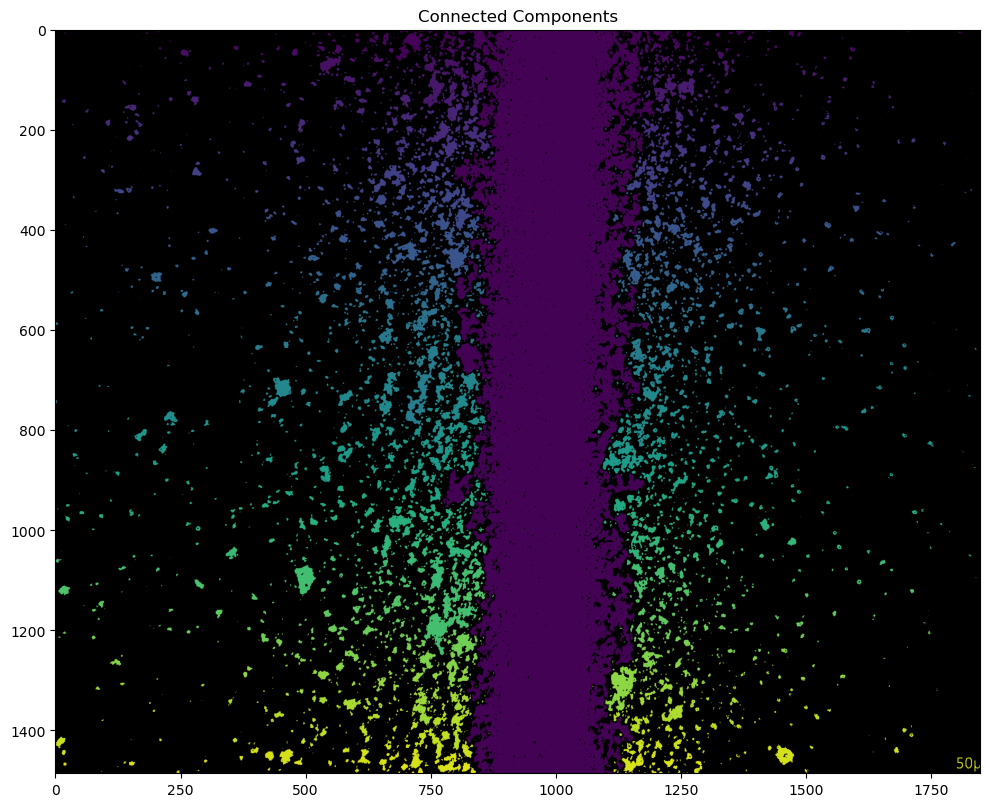

In [2]:
import numpy as np
import cv2
from scipy.ndimage.measurements import label
import matplotlib.pyplot as plt

def process_image(image_path):
    # Read the image
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = input_image.shape
    
    # 1. Convert image to numpy array A
    A = input_image
    
    # 2. Create array B of ones with same size as A
    B = np.ones_like(A)
    
    # 3. Multiply B by 255
    B = B * 255
    
    # 4. Create matrix C = B - A
    C = B - A
    
    # Convert to uint8 for contour detection
    C_uint8 = C.astype(np.uint8)
    
    # Apply Otsu thresholding to create binary image
    _, binary = cv2.threshold(C_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find connected components
    labeled_array, num_labels = label(binary)
    
    # Create a color map for visualization
    colors = plt.cm.viridis(np.linspace(0, 1, num_labels))[:, :3]
    
    # Create image with unique colors for each component
    component_image = np.zeros((C_uint8.shape[0], C_uint8.shape[1], 3), dtype=np.uint8)
    for i in range(1, num_labels):
        component_image[labeled_array == i] = (colors[i-1] * 255).astype(np.uint8)
    
    # Crop the image
    crop_bottom = 50
    crop_sides = 100
    cropped_image = component_image[0:height-crop_bottom, crop_sides:width-crop_sides]
    
    # Display the results
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(cropped_image)
    ax.set_title('Connected Components')
    plt.tight_layout()
    plt.show()
    
    return cropped_image

# Usage
image_path = "/Users/srikar/Desktop/AJP new data/UT_C9_FR10_S2_t1.tif"
processed_image = process_image(image_path)